# **Logistic regression**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 27/11/2022*

---

## **Importing data**

In Artificial Intelligence the modeling is the **creation, training, and deployment** of Machine Learning algorithms. The goal is to emulate logical decision-making based on the available data. 

In [1]:
# RUN ONLY FOR GOOGLE COLAB

# from google.colab import drive

# drive.mount("path")  

# %cd "path"

In [17]:
# Importing the necessary libraries for the data analysis and transformations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from joblib import dump

In [18]:
smote = False

In [19]:
# Obtaining the train and test dataset

x_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.csv')
y_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.csv')

In [20]:
if smote:
    x_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/x_train.csv')
    y_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/y_train.csv')
else:    
    # Dividing the train dataset
    train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/original_train.csv')
    x_train = train.drop(['Churn'], axis=1)
    y_train = pd.DataFrame(train['Churn'])

In [21]:
logreg = LogisticRegression(random_state=100)

# fit the model with data
logreg.fit(x_train, y_train)

y_logregpred = logreg.predict(x_test)

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print("Score:")
print(logreg.score(x_test, y_test))

Score:
0.7892992424242424


In [23]:
#Creating a confusion matrix to help determinate accuracy wtih classification model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [24]:
#Evaluataion of the predictions against the actual observations in y_val
cm = confusion_matrix(y_logregpred, y_test)

#Printing the accuracy
acc = round(accuracy(cm),2)
percentage = "{:.0%}".format(acc)
print(f"Accuracy of Model: {percentage}")

Accuracy of Model: 79%


In [25]:
# Confussion Matrix
pd.DataFrame(cm)

,0,1
0,1420,314
1,131,247


In [26]:
# K-Fold Cross-Validation
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


In [27]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(4,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.savefig('../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/benchmark/k_cross_plot.png')
        plt.show()

In [28]:
logistic_regression_results = cross_validation(logreg, x_train, y_train)
logistic_regression_results

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Training Accuracy scores': array([0.78764831, 0.7928202 , 0.78284672]),
 'Mean Training Accuracy': 78.7771742549911,
 'Training Precision scores': array([0.63509317, 0.6542811 , 0.63573883]),
 'Mean Training Precision': 0.6417043659543419,
 'Training Recall scores': array([0.4690367 , 0.46444954, 0.42431193]),
 'Mean Training Recall': 0.45259938837920494,
 'Training F1 scores': array([0.53957784, 0.54325956, 0.50894085]),
 'Mean Training F1 Score': 0.5305927488584937,
 'Validation Accuracy scores': array([0.78649635, 0.77798054, 0.79427876]),
 'Mean Validation Accuracy': 78.62518813378688,
 'Validation Precision scores': array([0.64604811, 0.61488673, 0.65408805]),
 'Mean Validation Precision': 0.6383409638905623,
 'Validation Recall scores': array([0.43119266, 0.43577982, 0.47706422]),
 'Mean Validation Recall': 0.44801223241590216,
 'Validation F1 scores': array([0.51719395, 0.51006711, 0.55172414]),
 'Mean Validation F1 Score': 0.5263283999184644}

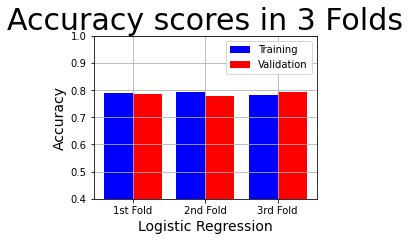

In [29]:
# Plot Accuracy Result
model_name = "Logistic Regression"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            logistic_regression_results["Training Accuracy scores"],
            logistic_regression_results["Validation Accuracy scores"])

In [30]:
# Calculatin the MSE and accuracy in the training and test

# Train
y_train_predict = logreg.predict(x_train)
y_train_true = y_train
# MSE
mse_train = mean_squared_error(y_train_true, y_train_predict)
print(f'MSE Train: {mse_train}')
# Accuracy
acc_train = accuracy_score(y_train_true, y_train_predict, normalize=True)
print(f'Accuracy Train: {acc_train}')

# Test
y_test_predict = logreg.predict(x_test)
y_test_true = y_test
# MSE
mse_test = mean_squared_error(y_test_true, y_test_predict)
print(f'MSE Test: {mse_test}')
# Accuracy
acc_test = accuracy_score(y_test_true, y_test_predict, normalize=True)
print(f'Accuracy Test: {acc_test}')


MSE Train: 0.2127357533968769
Accuracy Train: 0.7872642466031231
MSE Test: 0.21070075757575757
Accuracy Test: 0.7892992424242424


### **Exporting the model**
****

In [31]:
if smote:
    dump(logreg, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/benchmark/logistic_regression_model_smote.joblib")
else:
    dump(logreg, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/benchmark/logistic_regression_model.joblib")